<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Simple%20linear%20regression(Delivery%20time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
path = r"/content/delivery_time.csv"

In [4]:
dataset = pd.read_csv(path)

In [5]:
dataset.rename(columns={'Delivery Time': 'DeliveryTime', 'Sorting Time': 'SortingTime'}, inplace=True)

In [6]:
model_1 = smf.ols('DeliveryTime ~ SortingTime', data=dataset).fit()

In [7]:
model_2 = smf.ols('DeliveryTime ~ np.log(SortingTime)', data=dataset).fit()


In [8]:
model_3 = smf.ols('DeliveryTime ~ np.sqrt(SortingTime)', data=dataset).fit()

In [9]:
model_4 = smf.ols('DeliveryTime ~ np.exp(SortingTime)', data=dataset).fit()

In [10]:
print("R-squared values:")
print("Model 1 (No transformation):", model_1.rsquared)
print("Model 2 (Log transformation):", model_2.rsquared)
print("Model 3 (Square root transformation):", model_3.rsquared)
print("Model 4 (Exponential transformation):", model_4.rsquared)

R-squared values:
Model 1 (No transformation): 0.6822714748417231
Model 2 (Log transformation): 0.6954434611324223
Model 3 (Square root transformation): 0.695806227630867
Model 4 (Exponential transformation): 0.3611177022709089


In [11]:
best_model = model_1
best_model_name = "Model 1 (No transformation)"

if model_2.rsquared > best_model.rsquared:
    best_model = model_2
    best_model_name = "Model 2 (Log transformation)"

if model_3.rsquared > best_model.rsquared:
    best_model = model_3
    best_model_name = "Model 3 (Square root transformation)"

if model_4.rsquared > best_model.rsquared:
    best_model = model_4
    best_model_name = "Model 4 (Exponential transformation)"

In [12]:
print("Best Model:", best_model_name)

Best Model: Model 3 (Square root transformation)


In [13]:
new_data = pd.DataFrame({'SortingTime': np.linspace(1, 10, 100)})
predictions = best_model.predict(new_data)

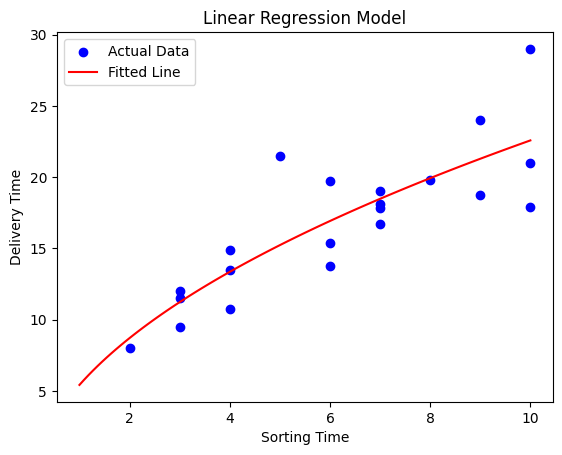

In [14]:
plt.scatter(dataset['SortingTime'], dataset['DeliveryTime'], color='blue', label='Actual Data')
plt.plot(new_data['SortingTime'], predictions, color='red', label='Fitted Line')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Linear Regression Model')
plt.legend()
plt.show()